In [1]:
from selenium import webdriver
from selenium.webdriver.common.by import By
import pickle


class PickleableLink:
    def __init__(self, link_data):
        self.picklable_data = link_data
        
linkList = []

driver=webdriver.Chrome()
for i in range(200,350):
    driver.get(f"https://www.chotot.com/mua-ban-dien-thoai-ha-noi?page={i}")
    links_raw = driver.find_elements(By.CLASS_NAME, "AdItem_adItem__gDDQT")
    for link in links_raw:
        http = link.get_attribute('href')
        pickleable_link = PickleableLink(http)
        linkList.append(pickleable_link)


with open("test", "wb") as fp:   #Pickling
    pickle.dump(linkList, fp)

In [2]:
import pickle

clean_list = []

class PickleableLink:
    def __init__(self, link_data):
        self.picklable_data = link_data

# Unpickle the data
with open("test", "rb") as fp:
    link_list = pickle.load(fp)

# Extract and print the URLs
for link_object in link_list:
    url = link_object.picklable_data
    modified_url = url.rstrip(']')
    clean_list.append(modified_url)

with open("clean_url", "wb") as fp:   #Pickling
    pickle.dump(clean_list, fp)

In [3]:
import json

class PickleableLink:
    def __init__(self, link_data):
        self.picklable_data = link_data

class CustomEncoder(json.JSONEncoder):
    def default(self, obj):
        if isinstance(obj, PickleableLink):
            return {'picklable_data': obj.picklable_data}
        return super().default(obj)

# Unpickle the data
with open("clean_url", "rb") as fp:
    link_list = pickle.load(fp)

# Serialize to JSON with the custom encoder
json_data = json.dumps(link_list, cls=CustomEncoder)

# Save JSON to a file
with open("cleaned_data.json", "w") as json_file:
    json_file.write(json_data)


In [4]:
from selenium import webdriver
from selenium.webdriver.common.by import By
import json
import pandas as pd
with open("cleaned_data.json", "rb") as fp:   # Unpickling
    linkItem = json.load(fp)
#datacleaning duplicate cleaning...
import pandas as pd
from selenium.webdriver.common.action_chains import ActionChains

df = pd.DataFrame(columns = 
    ['title', 'price', 'hang','dong','baohanh','mausac','dungluong','xuatxu', 'tinhtrang'])
driver=webdriver.Chrome()

# title = []
# price = []
# hang= []
# dong = []
# baohanh=  []
# mausac = []
# dungluong = []
# xuatxu = []

one_time = True
for link in linkItem:
    
    driver.get(link)
    # elem = driver.find_element(By.CSS_SELECTOR, ".some > selector")
    # ac = ActionChains(driver)
    # ac.move_by_offset(30, 30).click().perform()
    # button = driver.find_element(By.XPATH, "/html/body/div[1]/div/div[4]")
    # button.click()
    if one_time:
        driver.implicitly_wait(3)
        ac = ActionChains(driver)
        ac.move_by_offset(100, 100).click().perform()
        one_time = False

    try:
        title = driver.find_element(By.XPATH, "//h1[@class='AdDecription_adTitle__AG9r4' and @itemprop='name']").text
    except:
        title = None

    try:
        price = driver.find_element(By.XPATH, "//span[contains(@class, 'AdDecription_price__L2jjH')]/span[@itemprop='price']").text
        # price = [int(p.replace(' đ', '').replace('.', '')) for p in prices]
    except:
        price = None
    
    # button = driver.find_element(By.XPATH, '/html/body/div[1]/div/div[4]/div[1]/div/div[4]/div/div[4]/button')
    # button.click()
    
    try:
        hang = driver.find_element(By.XPATH, "//span[@itemprop='mobile_brand' and contains(@class, 'AdParam_adParamValue__IfaYa')]").text
    except:
        hang = None

    try:
        dong = driver.find_element(By.XPATH, "//span[@itemprop='mobile_model' and contains(@class, 'AdParam_adParamValue__IfaYa')]").text
    except:
        dong = None

    try:
        baohanh = driver.find_element(By.XPATH, "//span[@itemprop='elt_warranty' and contains(@class, 'AdParam_adParamValue__IfaYa')]").text
    except:
        baohanh = None
    try:
        mausac = driver.find_element(By.XPATH, "//span[@itemprop='mobile_color' and contains(@class, 'AdParam_adParamValue__IfaYa')]").text
    except:
        mausac= None

    try:
        dungluong = driver.find_element(By.XPATH, "//span[@itemprop='mobile_capacity' and contains(@class, 'AdParam_adParamValue__IfaYa')]").text
    except:
        dungluong = None

    try:
        xuatxu = driver.find_element(By.XPATH, "//span[@itemprop='elt_origin' and contains(@class, 'AdParam_adParamValue__IfaYa')]").text
    except:
        xuatXu = None

    try:
        tinhtrang = driver.find_element(By.XPATH, "//span[@itemprop='elt_condition' and contains(@class, 'AdParam_adParamValue__IfaYa')]").text
    except:
        tinhtrang = None

    df = pd.concat([df, pd.DataFrame(
        {'title' : [title], 'price' : [price], 'hang' : [hang],'dong' : [dong] ,'baohanh': [baohanh],'mausac': [mausac],'dungluong' : [dungluong],'xuatxu' : [xuatxu], 'tinhtrang' : [tinhtrang]})],ignore_index = True)
    df.to_csv('data_crawl.csv', index=False, encoding='utf-8')  
    print(hang)
    print('------')

Apple
------
Apple
------
Samsung
------
Apple
------
Samsung
------
Apple
------
Apple
------
Samsung
------
Apple
------
Xiaomi
------
Apple
------
Apple
------
Apple
------
Apple
------
Apple
------
Apple
------
Xiaomi
------
Apple
------
Apple
------
Apple
------
Xiaomi
------
Apple
------
Samsung
------
Samsung
------
Samsung
------
Apple
------
Apple
------
Samsung
------
Samsung
------
Samsung
------
Samsung
------
Oppo
------
Apple
------
Apple
------
Oppo
------
Xiaomi
------
Google
------
Apple
------
Apple
------
Samsung
------
Huawei
------
Oppo
------
Apple
------
Google
------
Apple
------
Apple
------
Apple
------
Apple
------
Apple
------
Samsung
------
Apple
------
Sony
------
Xiaomi
------
Apple
------
Google
------
Xiaomi
------
Apple
------
None
------
Samsung
------
Apple
------
Samsung
------
Apple
------
Apple
------
Apple
------
Apple
------
Oppo
------
Xiaomi
------
Oppo
------
Realme
------
Realme
------
Apple
------
Xiaomi
------
Apple
------
Realme
------
Ap

In [6]:
import pandas as pd

# Đọc file CSV vào DataFrame
df = pd.read_csv('data_crawl.csv')

# Loại bỏ các dòng có giá trị khuyết (NaN) trong DataFrame
df.dropna(inplace=True)

# Lưu DataFrame đã xử lý vào file CSV mới
df.to_csv('data.csv', index=False)

In [8]:
df

,title,price,hang,dong,baohanh,mausac,dungluong,xuatxu,tinhtrang
0,iphone 14 Pro vs 14 Pro Max 128GB 256GB BH 1 đ...,17.999.000 đ,Apple,iPhone 14 Pro Max,Bảo hành hãng,Màu khác,128 GB,Đang cập nhật,Đã sử dụng (chưa sửa chữa)
1,iPhone 5s vs 5se (SE 2016) 16GB 32GB BH 1 đổi 1,700.000 đ,Apple,iPhone 5SE,Hết bảo hành,Màu khác,32 GB,Đang cập nhật,Đã sử dụng (chưa sửa chữa)
2,Samsung Galaxy Note 20 vs Note 20 Ultra BH 1 đ...,5.500.000 đ,Samsung,Galaxy Note 20 Ultra,Bảo hành hãng,Màu khác,256 GB,Đang cập nhật,Đã sử dụng (chưa sửa chữa)
3,iPhone 11 Pro Max 64G Quốc Tế/Trả góp 0đ,6.990.000 đ,Apple,iPhone 11 Pro Max,4-6 tháng,Màu khác,64 GB,Mỹ,Đã sử dụng (chưa sửa chữa)
4,Galaxy S22 5G Mỹ 2 Sim chip Snap 8 Gen 1 Nguyên Z,7.900.000 đ,Samsung,Galaxy S22,>12 tháng,Trắng,128 GB,Mỹ,Đã sử dụng (chưa sửa chữa)
...,...,...,...,...,...,...,...,...,...
2984,*** mua 05/3/2024 tại TGDD. bán gấp 3 tr,3.000.000 đ,Vivo,V23e,1 tháng,Vàng,128 GB,Nước khác,Đã sử dụng (chưa sửa chữa)
2985,điện thoại,9.500.000 đ,Apple,iPhone 12 Pro Max,Bảo hành hãng,Trắng,16 GB,Đang cập nhật,Đã sử dụng (chưa sửa chữa)
2986,13prm xanh lock 128gb pin 88 sẵn sim ghép,13.000.000 đ,Apple,iPhone 13 Pro Max,Hết bảo hành,Xanh lá,128 GB,Mỹ,Đã sử dụng (chưa sửa chữa)
2987,xsm khách pass lại giá cực hời hời nhanh tay ae,6.600.000 đ,Apple,iPhone XS Max,7-12 tháng,Đen,256 GB,Mỹ,Mới


In [9]:
df.info


<bound method DataFrame.info of                                                   title         price  \
0     iphone 14 Pro vs 14 Pro Max 128GB 256GB BH 1 đ...  17.999.000 đ   
1       iPhone 5s vs 5se (SE 2016) 16GB 32GB BH 1 đổi 1     700.000 đ   
2     Samsung Galaxy Note 20 vs Note 20 Ultra BH 1 đ...   5.500.000 đ   
3              iPhone 11 Pro Max 64G Quốc Tế/Trả góp 0đ   6.990.000 đ   
4     Galaxy S22 5G Mỹ 2 Sim chip Snap 8 Gen 1 Nguyên Z   7.900.000 đ   
...                                                 ...           ...   
2984           *** mua 05/3/2024 tại TGDD. bán gấp 3 tr   3.000.000 đ   
2985                                         điện thoại   9.500.000 đ   
2986          13prm xanh lock 128gb pin 88 sẵn sim ghép  13.000.000 đ   
2987    xsm khách pass lại giá cực hời hời nhanh tay ae   6.600.000 đ   
2988                     iphone 12 128gb zin màn bầm tí   5.700.000 đ   

         hang                  dong        baohanh    mausac dungluong  \
0       Apple    

In [20]:
hang_density = df['hang'].value_counts(normalize=True)

# Hiển thị kết quả thống kê mật độ xuất hiện của cột "hang"
print(hang_density)

hang
Apple               0.518868
Samsung             0.177358
Xiaomi              0.107547
Oppo                0.055094
Huawei              0.025283
Realme              0.020000
Google              0.013585
Vsmart              0.012075
Sony                0.011698
LG                  0.010943
Vivo                0.009811
Nokia phổ thông     0.006415
Hãng khác           0.006415
Nokia thông minh    0.004906
OnePlus             0.004528
Sharp               0.003019
Pocophone           0.001887
HTC                 0.001887
Asus                0.001887
Nubia               0.001509
Tecno               0.001509
Motorola            0.000755
Aquos               0.000755
Meizu               0.000377
Itel                0.000377
Masstel             0.000377
Asanzo              0.000377
Ulefone             0.000377
Sky                 0.000377
Name: proportion, dtype: float64


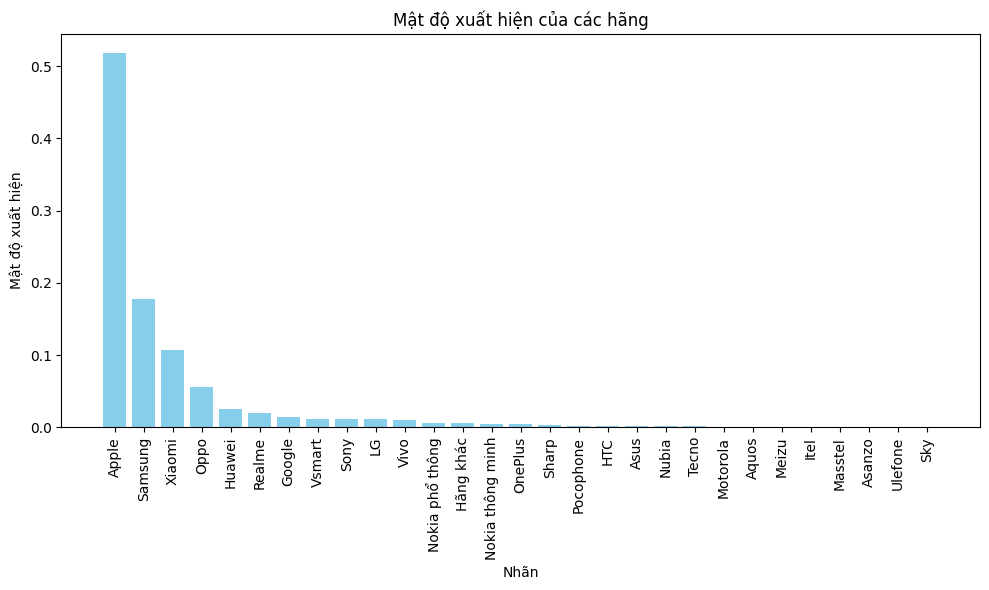

In [29]:
import matplotlib.pyplot as plt

# Dữ liệu mật độ xuất hiện của các nhãn
data = {
    "Apple": 0.518868,
    "Samsung": 0.177358,
    "Xiaomi": 0.107547,
    "Oppo": 0.055094,
    "Huawei": 0.025283,
    "Realme": 0.020000,
    "Google": 0.013585,
    "Vsmart": 0.012075,
    "Sony": 0.011698,
    "LG": 0.010943,
    "Vivo": 0.009811,
    "Nokia phổ thông": 0.006415,
    "Hãng khác": 0.006415,
    "Nokia thông minh": 0.004906,
    "OnePlus": 0.004528,
    "Sharp": 0.003019,
    "Pocophone": 0.001887,
    "HTC": 0.001887,
    "Asus": 0.001887,
    "Nubia": 0.001509,
    "Tecno": 0.001509,
    "Motorola": 0.000755,
    "Aquos": 0.000755,
    "Meizu": 0.000377,
    "Itel": 0.000377,
    "Masstel": 0.000377,
    "Asanzo": 0.000377,
    "Ulefone": 0.000377,
    "Sky": 0.000377
}

# Chuyển dữ liệu thành list để vẽ biểu đồ
labels = list(data.keys())
proportions = list(data.values())

# Vẽ biểu đồ cột
plt.figure(figsize=(10, 6))
plt.bar(labels, proportions, color='skyblue')
plt.xlabel('Nhãn')
plt.ylabel('Mật độ xuất hiện')
plt.title('Mật độ xuất hiện của các hãng')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


In [17]:
# Tạo một từ điển chứa mật độ xuất hiện của các nhãn
# hang_density = {
#     "Apple": 0.518868,
#     "Samsung": 0.177358,
#     "Xiaomi": 0.107547,
#     # Các nhãn khác...
# }

# Sắp xếp từ điển theo mật độ xuất hiện giảm dần
sorted_hang_density = sorted(hang_density.items(), key=lambda x: x[1], reverse=True)

# Gán số lớn cho các nhãn dựa trên thứ tự mật độ xuất hiện
hang_encoding = {}
for i, (hang, density) in enumerate(sorted_hang_density):
    hang_encoding[hang] = i

# In kết quả
print(hang_encoding)

{'Apple': 0, 'Samsung': 1, 'Xiaomi': 2, 'Oppo': 3, 'Huawei': 4, 'Realme': 5, 'Google': 6, 'Vsmart': 7, 'Sony': 8, 'LG': 9, 'Vivo': 10, 'Nokia phổ thông': 11, 'Hãng khác': 12, 'Nokia thông minh': 13, 'OnePlus': 14, 'Sharp': 15, 'Pocophone': 16, 'HTC': 17, 'Asus': 18, 'Nubia': 19, 'Tecno': 20, 'Motorola': 21, 'Aquos': 22, 'Meizu': 23, 'Itel': 24, 'Masstel': 25, 'Asanzo': 26, 'Ulefone': 27, 'Sky': 28}


In [30]:
bh_density = df['baohanh'].value_counts(normalize=True)
# Hiển thị toàn bộ Series 'dong' mà không bị cắt bớt
pd.set_option('display.max_rows', None)
print(bh_density)

baohanh
Hết bảo hành     0.382264
Bảo hành hãng    0.271321
Còn bảo hành     0.083019
1 tháng          0.057358
4-6 tháng        0.055472
3 tháng          0.050943
7-12 tháng       0.048302
>12 tháng        0.047547
2 tháng          0.003774
Name: proportion, dtype: float64


In [32]:
import pandas as pd

# Đọc file CSV vào DataFrame
df = pd.read_csv('data.csv')

# Thực hiện biến đổi dữ liệu trong cột "Bảo hành"
df['baohanh'] = df['baohanh'].replace({
    'Hết bảo hành': 'Hết bảo hành',
    'Bảo hành hãng': 'Còn bảo hành hãng',
    'Còn bảo hành': 'Còn bảo hành hãng',
    '1 tháng': 'Bảo hành từ người bán',
    '4-6 tháng': 'Bảo hành từ người bán',
    '3 tháng': 'Bảo hành từ người bán',
    '7-12 tháng': 'Bảo hành từ người bán',
    '>12 tháng': 'Bảo hành từ người bán',
    '2 tháng': 'Bảo hành từ người bán'
})

# Lưu DataFrame đã biến đổi thành file CSV mới
df.to_csv('data_moi.csv', index=False)

# In kết quả sau khi biến đổi và lưu thành công
print("Biến đổi và lưu file thành công!")


Biến đổi và lưu file thành công!


In [58]:
df = pd.read_csv('data_moi3.csv')
bh_density = df['baohanh'].value_counts(normalize=True)
# Hiển thị toàn bộ Series 'dong' mà không bị cắt bớt
pd.set_option('display.max_rows', None)
print(bh_density)

baohanh
Hết bảo hành             0.382264
Còn bảo hành hãng        0.354340
Bảo hành từ người bán    0.263396
Name: proportion, dtype: float64


In [63]:
bh_density_ = sorted(bh_density.items(), key=lambda x: x[1], reverse=True)

# Gán số lớn cho các nhãn dựa trên thứ tự mật độ xuất hiện
bh_encoding = {}
for i, (baohanh, density) in enumerate(bh_density_):
    bh_encoding[baohanh] = i

# In kết quả
print(bh_encoding)

{'Hết bảo hành': 0, 'Còn bảo hành hãng': 1, 'Bảo hành từ người bán': 2}


In [34]:
mausac_density = df['mausac'].value_counts(normalize=True)
# Hiển thị toàn bộ Series 'dong' mà không bị cắt bớt
pd.set_option('display.max_rows', None)
print(mausac_density)

mausac
Đen                     0.218868
Xanh dương              0.172075
Màu khác                0.132830
Vàng                    0.121509
Trắng                   0.116981
Đen bóng - Jet black    0.047547
Bạc                     0.046038
Xanh lá                 0.043019
Xám                     0.033962
Đỏ                      0.024528
Vàng hồng               0.023019
Hồng                    0.019623
Name: proportion, dtype: float64


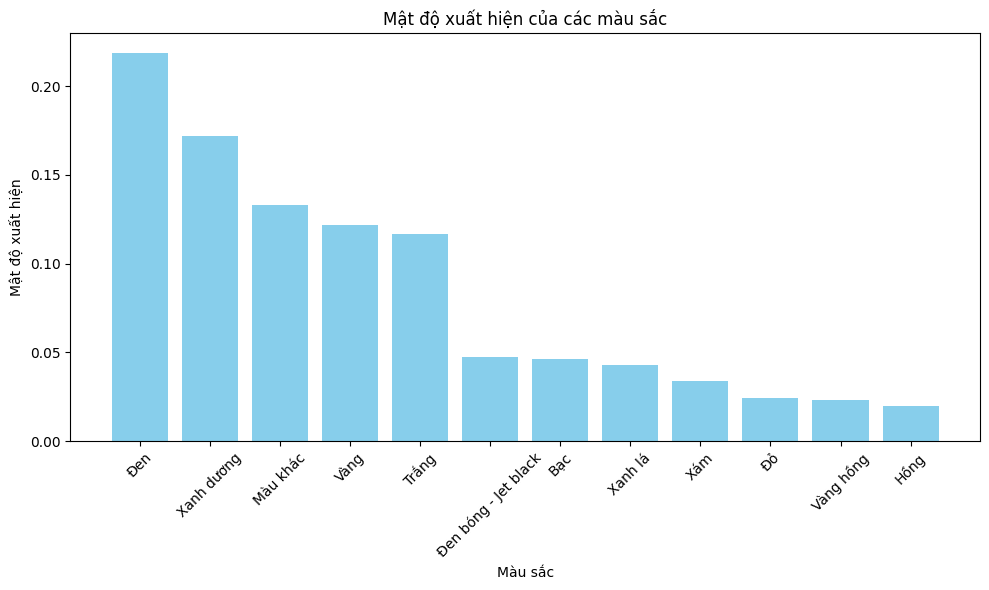

In [35]:
import matplotlib.pyplot as plt

# Dữ liệu mật độ xuất hiện của các màu sắc
colors = ['Đen', 'Xanh dương', 'Màu khác', 'Vàng', 'Trắng', 'Đen bóng - Jet black', 'Bạc', 'Xanh lá', 'Xám', 'Đỏ', 'Vàng hồng', 'Hồng']
densities = [0.218868, 0.172075, 0.132830, 0.121509, 0.116981, 0.047547, 0.046038, 0.043019, 0.033962, 0.024528, 0.023019, 0.019623]

# Vẽ biểu đồ cột
plt.figure(figsize=(10, 6))
plt.bar(colors, densities, color='skyblue')
plt.xlabel('Màu sắc')
plt.ylabel('Mật độ xuất hiện')
plt.title('Mật độ xuất hiện của các màu sắc')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [47]:
ms_density = sorted(mausac_density.items(), key=lambda x: x[1], reverse=True)

# Gán số lớn cho các nhãn dựa trên thứ tự mật độ xuất hiện
mausac_encoding = {}
for i, (mausac, density) in enumerate(ms_density):
    mausac_encoding[mausac] = i

# In kết quả
print(mausac_encoding)

{'Đen': 0, 'Xanh dương': 1, 'Màu khác': 2, 'Vàng': 3, 'Trắng': 4, 'Đen bóng - Jet black': 5, 'Bạc': 6, 'Xanh lá': 7, 'Xám': 8, 'Đỏ': 9, 'Vàng hồng': 10, 'Hồng': 11}


In [40]:
import pandas as pd

# Đọc file CSV vào DataFrame
df = pd.read_csv('data_moi.csv')

# Thực hiện xử lý dữ liệu trong cột "dungluong"
df['dungluong'] = df['dungluong'].str.replace('GB', '').str.replace('<', '').str.replace('>', '')

# Lưu DataFrame đã được chỉnh sửa lại thành file CSV mới
df.to_csv('data_moi2.csv', index=False)

# In kết quả sau khi chỉnh sửa và lưu thành công
print("Chỉnh sửa và lưu file thành công!")


Chỉnh sửa và lưu file thành công!


In [41]:
df = pd.read_csv('data_moi2.csv')
dl_density = df['dungluong'].value_counts(normalize=True)
# Hiển thị toàn bộ Series 'dong' mà không bị cắt bớt
pd.set_option('display.max_rows', None)
print(dl_density)

dungluong
128    0.396981
256    0.250189
64     0.246415
32     0.066038
16     0.027925
8      0.012453
Name: proportion, dtype: float64


In [43]:
# Thực hiện xử lý dữ liệu trong cột "xuatxu"
df['xuatxu'] = df['xuatxu'].replace({'Đang cập nhật': 'Chưa rõ', 'Nước khác': 'Chưa rõ'})

# Lưu DataFrame đã được chỉnh sửa lại thành file CSV mới
df.to_csv('data_moi3.csv', index=False)

In [50]:
xx_density = df['xuatxu'].value_counts(normalize=True)
# Hiển thị toàn bộ Series 'dong' mà không bị cắt bớt
pd.set_option('display.max_rows', None)
print(xx_density)

xuatxu
Chưa rõ       0.326038
Việt Nam      0.284151
Mỹ            0.240000
Trung Quốc    0.070566
Hàn Quốc      0.049811
Nhật Bản      0.025283
Đức           0.001887
Đài Loan      0.001132
Ấn Độ         0.001132
Name: proportion, dtype: float64


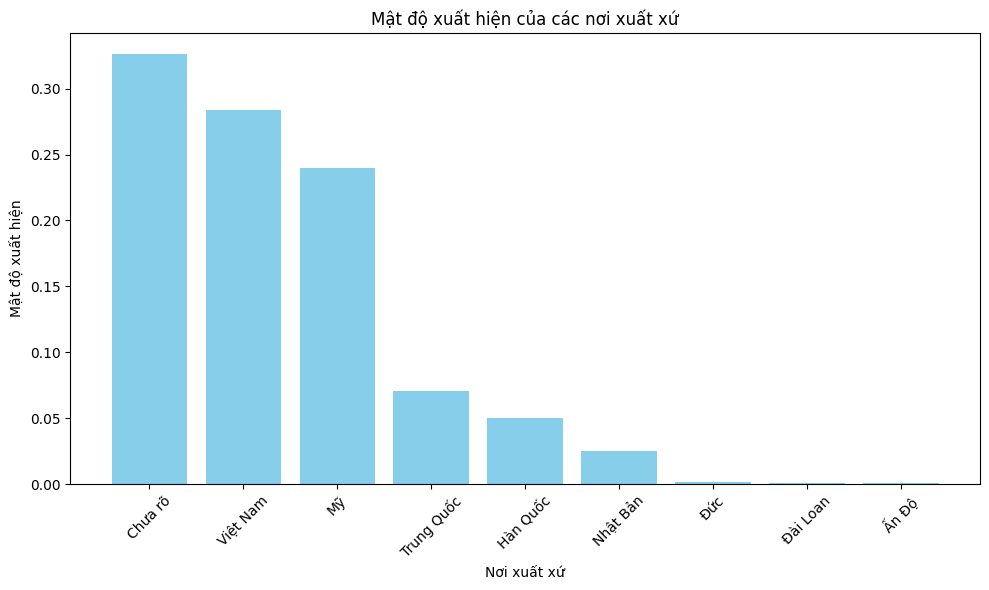

In [45]:
# Dữ liệu mật độ xuất hiện của các nơi xuất xứ
countries = ['Chưa rõ', 'Việt Nam', 'Mỹ', 'Trung Quốc', 'Hàn Quốc', 'Nhật Bản', 'Đức', 'Đài Loan', 'Ấn Độ']
densities = [0.326038, 0.284151, 0.240000, 0.070566, 0.049811, 0.025283, 0.001887, 0.001132, 0.001132]

# Vẽ biểu đồ cột
plt.figure(figsize=(10, 6))
plt.bar(countries, densities, color='skyblue')
plt.xlabel('Nơi xuất xứ')
plt.ylabel('Mật độ xuất hiện')
plt.title('Mật độ xuất hiện của các nơi xuất xứ')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [51]:
xx_density_ = sorted(xx_density.items(), key=lambda x: x[1], reverse=True)

# Gán số lớn cho các nhãn dựa trên thứ tự mật độ xuất hiện
xx_encoding = {}
for i, (xuatxu, density) in enumerate(xx_density_):
    xx_encoding[xuatxu] = i

# In kết quả
print(xx_encoding)

{'Chưa rõ': 0, 'Việt Nam': 1, 'Mỹ': 2, 'Trung Quốc': 3, 'Hàn Quốc': 4, 'Nhật Bản': 5, 'Đức': 6, 'Đài Loan': 7, 'Ấn Độ': 8}


In [52]:
tt_density = df['tinhtrang'].value_counts(normalize=True)
# Hiển thị toàn bộ Series 'dong' mà không bị cắt bớt
pd.set_option('display.max_rows', None)
print(tt_density)

tinhtrang
Đã sử dụng (chưa sửa chữa)    0.864151
Mới                           0.087547
Đã sử dụng (qua sửa chữa)     0.048302
Name: proportion, dtype: float64


In [53]:
tt_density_ = sorted(tt_density.items(), key=lambda x: x[1], reverse=True)

# Gán số lớn cho các nhãn dựa trên thứ tự mật độ xuất hiện
tt_encoding = {}
for i, (tinhtrang, density) in enumerate(tt_density_):
    tt_encoding[tinhtrang] = i

# In kết quả
print(tt_encoding)

{'Đã sử dụng (chưa sửa chữa)': 0, 'Mới': 1, 'Đã sử dụng (qua sửa chữa)': 2}


In [54]:
dong_density = df['dong'].value_counts(normalize=True)
# Hiển thị toàn bộ Series 'dong' mà không bị cắt bớt
pd.set_option('display.max_rows', None)
print(dong_density)

dong
iPhone 12 Pro Max                0.068302
Dòng khác                        0.065660
iPhone 11                        0.037358
iPhone XS Max                    0.034717
iPhone 11 Pro Max                0.033585
iPhone 14 Pro Max                0.029434
iPhone 13 Pro Max                0.028302
iPhone 12                        0.023774
iPhone XS                        0.020377
iPhone 12 Pro                    0.019245
iPhone 15 Pro Max                0.017736
iPhone 8 plus                    0.016604
iPhone 7 plus                    0.016226
iPhone 11 Pro                    0.015094
iPhone XR                        0.013962
iPhone 13                        0.012830
iPhone 14 Plus                   0.012075
iPhone 6S                        0.011321
iPhone X                         0.010566
iPhone 6                         0.010189
iPhone 6S plus                   0.009811
iPhone 13 Pro                    0.009434
iPhone 7                         0.008302
Redmi Note 11                

In [55]:
from sklearn.preprocessing import LabelEncoder

# Hãng điện thoại
brands = [
    'Apple', 'Samsung', 'Xiaomi', 'Oppo', 'Huawei', 'Realme', 'Google', 'Vsmart', 
    'Sony', 'LG', 'Vivo', 'Nokia phổ thông', 'Hãng khác', 'Nokia thông minh', 
    'OnePlus', 'Sharp', 'Pocophone', 'HTC', 'Asus', 'Nubia', 'Tecno', 'Motorola', 
    'Aquos', 'Meizu', 'Itel', 'Masstel', 'Asanzo', 'Ulefone', 'Sky'
]

# Dòng điện thoại
phone_models = [
    'iPhone 12 Pro Max', 'Dòng khác', 'iPhone 11', 'iPhone XS Max', 'iPhone 11 Pro Max', 
    'iPhone 14 Pro Max', 'iPhone 13 Pro Max', 'iPhone 12', 'iPhone XS', 'iPhone 12 Pro', 
    'iPhone 15 Pro Max', 'iPhone 8 plus', 'iPhone 7 plus', 'iPhone 11 Pro', 'iPhone XR', 
    'iPhone 13', 'iPhone 14 Plus', 'iPhone 6S', 'iPhone X', 'iPhone 6', 'iPhone 6S plus', 
    'iPhone 13 Pro', 'iPhone 7', 'Redmi Note 11', 'Galaxy S23 Ultra', 'iPhone 14 Pro', 
    'iPhone 12 Mini', 'Galaxy Note 20 Ultra', 'Galaxy Z Fold3', 'iPhone 6 plus', 
    'Galaxy A50', 'Galaxy A31', 'Galaxy S22 Ultra', 'Galaxy Z Fold4', 'Galaxy Note 10 Plus', 
    'Galaxy Note 20', 'Galaxy S20 Plus', 'Redmi Note 12', 'Galaxy Z Flip4', 'Galaxy S21 Ultra', 
    'iPhone 15 Pro', 'Galaxy A51', 'iPhone 15', 'Dòng Khác', 'iPhone SE', 'iPhone 8', 
    'iPhone 15 Plus', 'iPhone 14', 'Mate 20 Pro', 'Redmi Note 8', 'Galaxy Z Fold5', 
    'Xperia 1', 'Galaxy S24 Ultra', 'Galaxy S10 plus', 'Galaxy S20 FE', 'Mi 10', 'Xperia 5', 
    'Galaxy S23 Plus', 'Reno 2/2F', 'Joy 4', 'Galaxy S20 Ultra', '12 Pro', 'Galaxy Z Flip5', 
    'Galaxy S22', 'iPhone 5S', 'F11', 'Redmi Note 10s', 'Galaxy J7 Prime', 'Galaxy S21 Plus', 
    'Galaxy Note 9', 'Redmi 9A', 'Mate 10', '13 Pro', 'Pixel 7 Pro', 'Redmi Note 10', 
    'Galaxy A70', 'Redmi Note 9S', 'Galaxy S21', 'Galaxy A22', 'iPhone 5SE', '13 Lite', 
    '12', 'iPhone 13 Mini', 'Pixel 7', 'Redmi K40', 'Live 4', 'Pixel 6', 'Galaxy S9 Plus', 
    '13', 'Galaxy Note 10', 'Galaxy S20', 'Nova 3i', 'Mi 10T', 'Redmi Note 11 Pro', 
    'V60 ThinQ', 'F9', 'Velvet', 'Redmi K30 Ultra', 'Redmi 9T/K20', 'iPhone 4S', 'Redmi K30', 
    'A53', 'Find X7', 'Mi Mix 4', 'P30 Pro', 'C2', 'Galaxy M31', '8800', 'Galaxy S7 Edge', 
    'Galaxy Note 10 Lite', 'Galaxy Note 8', 'Galaxy S10E', 'Galaxy S10', 'Redmi Note 12 Turbo', 
    'Xperia XZ2/Xperia XZ2 Compact', 'Galaxy J7 Pro', 'Pixel 6 Pro', 'A3S', 'A93', 'Galaxy A03s', 
    'A54', 'Mate 30 Pro', 'Joy 3', 'F11 Pro', 'Redmi Note 13', '8 Pro', 'Galaxy Z Fold2', 
    'Galaxy M51', 'Aris', 'Mi 9T', 'Galaxy J6 plus', 'V30 ThinQ', 'Active 3', 'Find X5', 
    'Reno4', '11T', 'Redmi Note 10 Pro', 'F3 / F3 Lite', 'Reno5 Pro', 'Live', 'Redmi 5 Plus', 
    'Mi 8 Lite', 'Galaxy A71', 'F7', 'Find X6 Pro', 'V40 ThinQ', 'Google Pixel 3', '12X', 
    'Galaxy S7', 'Redmi Note 9', 'Mi 8 SE', 'Galaxy A02s', 'Galaxy S21 FE', 'Galaxy S22 Plus', 
    'Redmi 9C', 'iPhone 4', 'A5', 'Galaxy A5', 'A73', 'Reno3', 'Red Magic', 'Reno8 T', 'Reno7', 
    'Galaxy A23', 'Galaxy J7', 'Redmi K40s', '5i', 'Galaxy A20', 'Xperia XZ3', 'P30', 'A5S', 
    'Galaxy S10 X', 'U12 Plus', 'Galaxy A52', 'Redmi K70', 'X80', 'A77', 'Galaxy M33', 
    'Black Shark 4', 'POCO M4 Pro', 'Reno2 Z', 'Galaxy A10S', 'ROG Phone 6', 'Galaxy A03', 
    'POCO X3 Pro', 'Galaxy A90', 'Reno7 Pro', 'Pixel 5', 'P40 Pro', 'Reno', 'Redmi Note 13 Pro', 
    'Galaxy Z Fold', 'Galaxy A10', 'Y91C', 'V23e', 'Mate 40 Pro', 'Galaxy A32', 'Galaxy J7 Plus', 
    '12T', '6700', 'Galaxy A7', 'Galaxy J4', 'C11', 'Galaxy A34', '12T Pro', 'Reno Z', 'ROG Phone 5', 
    'A16K', '11T Pro', 'Pixel 4', 'Mi A2', 'Reno5', 'Galaxy A04', 'G8 ThinQ', 'Mi A2 Lite', 'Redmi 10A', 
    'Lumia 1020', 'Galaxy A54', 'A78', 'Galaxy A30', 'R15', 'Galaxy A12', 'Galaxy A33', 'P50', 'A52', '6', 
    'Redmi Note 7', '12s Pro', 'Galaxy S8', 'P50 Pro', 'Redmi K40 Pro', 'Mi 11', 'Y9', 'Mi 8', 'Mi 11 Ultra', 
    'Galaxy A6 Plus', 'Galaxy A20s', 'A92', 'Galaxy M32', 'V50 ThinQ', 'Galaxy M20', 'A57', 'Y7 Pro', 'A9', 
    '7 Pro', 'Ericsson', '9 Pro', 'V15', 'Galaxy A9 Pro', 'S1 Pro', 'Galaxy M14', 'A35', 'A15', 'Galaxy J2 Prime', 
    'Redmi K50', 'Redmi K30 Pro', '12s Ultra', 'Galaxy Xcover Pro 2', '2700', 'Reno10 Pro', 'IZI 100', 'Xperia X Performance', 
    '2', 'Nova 5 Pro', 'Redmi 10C', 'C3i', 'Galaxy J8', 'Find X2', '2 Pro', 'Galaxy A25', 'iPhone 3G/3GS', 'Y12s', '9', 
    'Y19', '10 evo', 'F2', 'Y12', 'Galaxy A05', 'Mi Note', 'Redmi K50 Pro', 'U11', 'Honor Magic 2', 'P40', 'Y6', 'C1', 
    'C31', 'Joy 1', 'Redmi Note 2 Pro', 'Mate 20X', '3 Pro', 'Mi Mix 3', 'A11W', 'A910', 'Galaxy Z Flip3', 'A74', 'AQUOS R3', 
    'Mi 6X', '108', 'Reno6 Pro', 'Xperia Z3', 'E72', 'Galaxy A10 Pro', 'Honor 8X max', 'A32', 'Galaxy A13', 'Redmi 12C', 
    'POCO X4 GT', 'S3 Plus', 'POCO M3', 'S1', 'Find X6', 'E63', 'A11', 'A59', 'Pixel 8', 'Redmi 13C', 'Galaxy S23', 
    'Redmi Note 5', 'P30 Lite', '10', 'Redmi 8/8A', '6500C', 'Galaxy A11', 'Redmi A2 Plus', 'Y21', '12s', 'Galaxy M12', 
    'Honor 9', '6100', 'Galaxy Grand 2', 'Galaxy A04e', 'A39', 'Y17', 'Mi 9', '230', 'Redmi Note 8 Pro', 'Galaxy Note 3', 
    'Galaxy J1', 'iPhone 5', '13 Ultra', '5 Pro', '8.1', 'G7 ThinQ', 'A31', 'Galaxy J5', 'Reno9', 'Galaxy S9', '3', 'Galaxy Note 4', 
    'R1S', 'Xshot', 'Redmi K20 Pro', 'C3', 'Galaxy A04s', 'Galaxy A52s', 'P60 Art', 'Lumia 930', '6.1 Plus', 'Lumia 950', 
    'F1', 'Galaxy S5', 'Lumia 1520', 'Galaxy A6', '5.1 Plus', 'ROG Phone', 'Lumia 730', 'Mi Max 2', 'Y93', 'IQ00', 'POCO M5', 
    'Galaxy A53', 'Y11', 'Galaxy S10 Lite', 'Reno10', '105', 'Redmi 7', 'Reno6 Z', 'A7', 'A3', 'Find X2 Pro', 'Lumia 640 XL', 
    'Mi Mix 2S', 'Galaxy A73', 'Magic', 'Zenfone 4 max pro', 'Galaxy A72', 'A55', 'One M9', 'G8', 'P9 Plus', 'Find X3', 'Mate X', 
    'Y51', 'Redmi Note 11 Pro Plus', 'Redmi Note 9 Pro', 'GT Neo 2', 'Mi Note 10', 'Find X3 Pro'
]

# Label encoding cho hãng điện thoại
brand_encoder = LabelEncoder()
brand_encoder.fit(brands)
encoded_brands = brand_encoder.transform(brands)

# Label encoding cho dòng điện thoại
phone_model_encoder = LabelEncoder()
phone_model_encoder.fit(phone_models)
encoded_phone_models = phone_model_encoder.transform(phone_models)

# In kết quả
print("Encoded brands:")
print(dict(zip(brands, encoded_brands)))
print("\nEncoded phone models:")
print(dict(zip(phone_models, encoded_phone_models)))

Encoded brands:
{'Apple': 0, 'Samsung': 20, 'Xiaomi': 28, 'Oppo': 17, 'Huawei': 6, 'Realme': 19, 'Google': 4, 'Vsmart': 27, 'Sony': 23, 'LG': 9, 'Vivo': 26, 'Nokia phổ thông': 13, 'Hãng khác': 7, 'Nokia thông minh': 14, 'OnePlus': 16, 'Sharp': 21, 'Pocophone': 18, 'HTC': 5, 'Asus': 3, 'Nubia': 15, 'Tecno': 24, 'Motorola': 12, 'Aquos': 1, 'Meizu': 11, 'Itel': 8, 'Masstel': 10, 'Asanzo': 2, 'Ulefone': 25, 'Sky': 22}

Encoded phone models:
{'iPhone 12 Pro Max': 366, 'Dòng khác': 76, 'iPhone 11': 360, 'iPhone XS Max': 397, 'iPhone 11 Pro Max': 362, 'iPhone 14 Pro Max': 374, 'iPhone 13 Pro Max': 370, 'iPhone 12': 363, 'iPhone XS': 396, 'iPhone 12 Pro': 365, 'iPhone 15 Pro Max': 378, 'iPhone 8 plus': 392, 'iPhone 7 plus': 390, 'iPhone 11 Pro': 361, 'iPhone XR': 395, 'iPhone 13': 367, 'iPhone 14 Plus': 372, 'iPhone 6S': 387, 'iPhone X': 394, 'iPhone 6': 385, 'iPhone 6S plus': 388, 'iPhone 13 Pro': 369, 'iPhone 7': 389, 'Redmi Note 11': 296, 'Galaxy S23 Ultra': 183, 'iPhone 14 Pro': 373, 'iPho

In [61]:
import pandas as pd

# Load dữ liệu từ file CSV
df = pd.read_csv('data_moi3.csv')
a = df['baohanh']
b = df['mausac']
c = df['dungluong']
d = df['xuatxu']
e = df['tinhtrang']

# Thay thế các cột 'Brand' và 'Phone Model' bằng các giá trị đã mã hóa
df['hang'] = df['hang'].map(dict(zip(brands, encoded_brands)))
df['dong'] = df['dong'].map(dict(zip(phone_models, encoded_phone_models)))
df['baohanh'] = df['baohanh'].map(dict(zip(a, bh_encoding)))
df['mausac'] = df['mausac'].map(dict(zip(b, mausac_encoding)))
df['dungluong'] = df['dungluong'].map(dict(zip(c, c)))
df['xuatxu'] = df['xuatxu'].map(dict(zip(d, xx_encoding)))
df['tinhtrang'] = df['tinhtrang'].map(dict(zip(e, tt_encoding)))

# Lưu dữ liệu đã được xử lý vào file CSV mới
df.to_csv('clean_data.csv', index=False)

In [2]:
import pandas as pd
df = pd.read_csv("data_crawl.csv")

In [3]:
df

,title,price,hang,dong,baohanh,mausac,dungluong,xuatxu,tinhtrang
0,iphone 14 Pro vs 14 Pro Max 128GB 256GB BH 1 đ...,17.999.000 đ,Apple,iPhone 14 Pro Max,Bảo hành hãng,Màu khác,128 GB,Đang cập nhật,Đã sử dụng (chưa sửa chữa)
1,iPhone 5s vs 5se (SE 2016) 16GB 32GB BH 1 đổi 1,700.000 đ,Apple,iPhone 5SE,Hết bảo hành,Màu khác,32 GB,Đang cập nhật,Đã sử dụng (chưa sửa chữa)
2,Samsung Galaxy Note 20 vs Note 20 Ultra BH 1 đ...,5.500.000 đ,Samsung,Galaxy Note 20 Ultra,Bảo hành hãng,Màu khác,256 GB,Đang cập nhật,Đã sử dụng (chưa sửa chữa)
3,iPhone 11 Pro Max 64G Quốc Tế/Trả góp 0đ,6.990.000 đ,Apple,iPhone 11 Pro Max,4-6 tháng,Màu khác,64 GB,Mỹ,Đã sử dụng (chưa sửa chữa)
4,Galaxy S22 5G Mỹ 2 Sim chip Snap 8 Gen 1 Nguyên Z,7.900.000 đ,Samsung,Galaxy S22,>12 tháng,Trắng,128 GB,Mỹ,Đã sử dụng (chưa sửa chữa)
...,...,...,...,...,...,...,...,...,...
2984,*** mua 05/3/2024 tại TGDD. bán gấp 3 tr,3.000.000 đ,Vivo,V23e,1 tháng,Vàng,128 GB,Nước khác,Đã sử dụng (chưa sửa chữa)
2985,điện thoại,9.500.000 đ,Apple,iPhone 12 Pro Max,Bảo hành hãng,Trắng,16 GB,Đang cập nhật,Đã sử dụng (chưa sửa chữa)
2986,13prm xanh lock 128gb pin 88 sẵn sim ghép,13.000.000 đ,Apple,iPhone 13 Pro Max,Hết bảo hành,Xanh lá,128 GB,Mỹ,Đã sử dụng (chưa sửa chữa)
2987,xsm khách pass lại giá cực hời hời nhanh tay ae,6.600.000 đ,Apple,iPhone XS Max,7-12 tháng,Đen,256 GB,Mỹ,Mới


In [4]:
tt_density = df['tinhtrang'].value_counts(normalize=True)

# Hiển thị kết quả thống kê mật độ xuất hiện của cột "hang"
print(tt_density)

tinhtrang
Đã sử dụng (chưa sửa chữa)    0.866937
Mới                           0.084431
Đã sử dụng (qua sửa chữa)     0.048632
Name: proportion, dtype: float64
